### Goal

Identify CNEs with sequence similarity to known transposable elements from Repbase

### Output

repbase_cne_ids.tsv  
'summary_combined.tsv'  
'phyla_counts.tsv'  
class_counts.tsv  
'hit_taxon_distrib.tsv' to plot number of phyla hit by each CNE with R   


Scatterplots of #Repbase hits VS #annotated Repbase seqs for each species. 


In [2]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### File paths

#### BLASTn against Repbase results

In [3]:
blastn_dir = "repbase_blastn_stitle/"
blastn_files = glob.glob(blastn_dir + "*.blastn")
blastn_files

['repbase_blastn_stitle/aaur_combined.blastn',
 'repbase_blastn_stitle/hsym_combined.blastn',
 'repbase_blastn_stitle/spis_combined.blastn',
 'repbase_blastn_stitle/nvec_combined.blastn',
 'repbase_blastn_stitle/pdam_combined.blastn',
 'repbase_blastn_stitle/epal_combined.blastn',
 'repbase_blastn_stitle/aten_combined.blastn',
 'repbase_blastn_stitle/adig_combined.blastn',
 'repbase_blastn_stitle/hvul_combined.blastn',
 'repbase_blastn_stitle/mvir_combined.blastn',
 'repbase_blastn_stitle/ofav_combined.blastn',
 'repbase_blastn_stitle/chem_combined.blastn',
 'repbase_blastn_stitle/dgig_combined.blastn']

#### TSV file of all sequence IDs from Repbase
Database'\t'TE_ID'\t'TE_class'\t'Species


In [4]:
rep_base_file = 'repbase_ids.tsv'

#### Total number of CNEs for each species

In [5]:
cne_count_file = "../../post_parsimony_filtering/cne_counts.tsv"

### Count CNEs with BLAST hits to Repbase

In [6]:
cne_count_df = pd.read_csv(cne_count_file, sep="\t", names=['species', 'cne_count'])
cne_count_df

,species,cne_count
0,aaur,2049
1,adig,50811
2,aten,5576
3,chem,2352
4,dgig,3644
5,epal,5313
6,hsym,6532
7,hvul,2540
8,mvir,2730
9,nvec,3824


### Identify and count CNEs with significant BLAST hit in Repbase 

In [7]:
transpo_cnes = []
summary_df = pd.DataFrame(columns=['species', 'cne_count', 'num_transposons', 'pct_transposon'])
for blast_file in blastn_files:
    blast_df = pd.read_csv(blast_file, sep="\t", names=['qseqid', 'stitle', 'sseqid', 'pident', 'length', 'mismatch',
                                                        'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue',
                                                        'bitscore'])
    blast_df = blast_df[blast_df['evalue'] < 0.1]
    sp_id = blast_file.split("/")[-1].split("_")[0]
    num_transpo = len(set(blast_df['qseqid']))
    num_cnes = int(cne_count_df[cne_count_df['species'] == sp_id]['cne_count'])
    pct_transpo = round(100*num_transpo/num_cnes, 2)
    new_row = [sp_id, num_cnes, num_transpo, pct_transpo]
    summary_df.loc[len(summary_df)] = new_row
    cne_list = list(set(blast_df['qseqid']))
    transpo_cnes = transpo_cnes + cne_list
summary_df

,species,cne_count,num_transposons,pct_transposon
0,aaur,2049,46,2.24
1,hsym,6532,61,0.93
2,spis,110941,370,0.33
3,nvec,3824,1240,32.43
4,pdam,85198,163,0.19
5,epal,5313,212,3.99
6,aten,5576,146,2.62
7,adig,50811,1177,2.32
8,hvul,2540,613,24.13
9,mvir,2730,16,0.59


### Output list of CNEs with Repbase hit to file

In [8]:
repbase_cnes_df = pd.DataFrame(transpo_cnes,columns=['cne_id'])
repbase_cnes_df.to_csv('repbase_cne_ids.tsv', sep="\t", index=False)
repbase_cnes_df

,cne_id
0,aaur_cne_2361
1,aaur_cne_1854
2,aaur_cne_1284
3,aaur_cne_2261
4,aaur_cne_3284
...,...
4473,dgig_cne_798
4474,dgig_cne_5719
4475,dgig_cne_6050
4476,dgig_cne_6901


### Analyze species distribution of Repbase
Number of BLAST hits for a species seems correlated to number of CNEs in Repbase for that species.  
--> assess correlation between species representation in Repbase and number of BLAST hits

In [9]:
rep_base_df = pd.read_csv(rep_base_file, sep="\t", names=['db', 'TE_id', 'TE_class', 'species'])
rep_base_df = rep_base_df[~rep_base_df['species'].isnull()]
rep_base_df

,db,TE_id,TE_class,species
0,angrep,Gypsy-25_AnFu-I,Gypsy,Anopheles funestus
1,angrep,Gypsy-68_AnFu-LTR,Gypsy,Anopheles funestus
2,angrep,P1_AG,P,Anopheles gambiae
3,angrep,L2B-1_AG,L2B,Anopheles gambiae
4,angrep,NotoAg1,R1,Anopheles gambiae
...,...,...,...,...
65348,zebrep,Mariner-N1_DR,Mariner/Tc1,Danio rerio
65349,zebrep,EnSpm-N42_DR,EnSpm/CACTA,Danio rerio
65350,zebrep,Gypsy-111_DR-LTR,Gypsy,Danio rerio
65351,zebrep,hAT5-N2B_DR,hAT,Danio rerio


#### Count Repbase TEs in same genus as species in CNEs dataset

In [10]:
genus_list = ['Aurelia', 'Acropora', 'Actinia', 'Clytia', 'Dendronephthya', 'Hydra v', 'Morbakka', 'Nematostella',
             'Orbicella', 'Pocillopora', 'Stylophora']

In [11]:
matching_sp_df = pd.DataFrame(columns=['db', 'TE_id', 'TE_class', 'species'])
for genus in genus_list:
    genus_df = rep_base_df[rep_base_df["species"].str.contains(genus)].drop_duplicates('TE_id')
    matching_sp_df = matching_sp_df.append(genus_df)

In [12]:
matching_sp_df

,db,TE_id,TE_class,species
21689,invrep,Gypsy-55_ADi-I,Gypsy,Acropora digitifera
21818,invrep,AcademH-N9_ADi,Academ,Acropora digitifera
21831,invrep,Harbinger-N10_ADi,Harbinger,Acropora digitifera
21894,invrep,Gypsy-39_ADi-LTR,Gypsy,Acropora digitifera
21945,invrep,Gypsy-18_Adi-I,Gypsy,Acropora digitifera
...,...,...,...,...
25688,invrep,AcademH-1_StPi,Academ,Stylophora pistillata
27291,invrep,Lanisha-2_StPi,EnSpm/CACTA,Stylophora pistillata
34647,invrep,AcademH-N1_StPi,Academ,Stylophora pistillata
34738,invrep,Lanisha-1_StPi,EnSpm/CACTA,Stylophora pistillata


In [13]:
repbase_sp_counts = matching_sp_df[['TE_id', 'species']].groupby('species').count().reset_index()
repbase_sp_counts = repbase_sp_counts.merge(matching_sp_df.groupby('species')['TE_class'].nunique().reset_index())
repbase_sp_counts

,species,TE_id,TE_class
0,Acropora digitifera,255,18
1,Acropora formosa,1,1
2,Acropora palmata,3,1
3,Actinia equina,41,2
4,Clytia hemisphaerica,1,1
5,Hydra vulgaris,745,41
6,Nematostella,1,1
7,Nematostella vectensis,758,45
8,Orbicella faveolata,6,1
9,Stylophora pistillata,6,2


In [14]:
#repbase_sp_counts.to_csv('repbase_sp_counts.tsv', sep="\t", index=False)

### Combine BLAST hits numbers and species representation stats for output

In [28]:
#repbase_sp = ['adig', 'adig', 'adig', 'aten', 'chem', 'hvul', 'nvec', 'nvec', 'ofav', 'spis']
#repbase_sp_counts['species'] = repbase_sp
#repbase_sp_counts

,species,TE_id,TE_class
0,adig,255,18
1,adig,1,1
2,adig,3,1
3,aten,41,2
4,chem,1,1
5,hvul,745,41
6,nvec,1,1
7,nvec,758,45
8,ofav,6,1
9,spis,6,2


In [31]:
#summary_combined = summary_df.merge(repbase_sp_counts, how='left').fillna(0)
#summary_combined

,species,cne_count,num_transposons,pct_transposon,TE_id,TE_class
0,aaur,2049,46,2.24,0.0,0.0
1,hsym,6532,61,0.93,0.0,0.0
2,spis,110941,370,0.33,6.0,2.0
3,nvec,3824,1240,32.43,1.0,1.0
4,nvec,3824,1240,32.43,758.0,45.0
5,pdam,85198,163,0.19,0.0,0.0
6,epal,5313,212,3.99,0.0,0.0
7,aten,5576,146,2.62,41.0,2.0
8,adig,50811,1177,2.32,255.0,18.0
9,adig,50811,1177,2.32,1.0,1.0


In [14]:
combined_df = pd.DataFrame(columns=['species_name', 'TE_id', 'TE_class', 'species'])
for idx, row in repbase_sp_counts.iterrows():
    new_row = list(row)
    if row['species'] != 'Nematostella':
        sp_id = row['species'][0].lower() + row['species'].split(" ")[1][:3]
        new_row.append(sp_id)
        combined_df.loc[len(combined_df)] = new_row
combined_df

,species_name,TE_id,TE_class,species
0,Acropora digitifera,255,18,adig
1,Acropora formosa,1,1,afor
2,Acropora palmata,3,1,apal
3,Actinia equina,41,2,aequ
4,Clytia hemisphaerica,1,1,chem
5,Hydra vulgaris,745,41,hvul
6,Nematostella vectensis,758,45,nvec
7,Orbicella faveolata,6,1,ofav
8,Stylophora pistillata,6,2,spis


In [15]:
summary_df

,species,cne_count,num_transposons,pct_transposon
0,aaur,2049,46,2.24
1,hsym,6532,61,0.93
2,spis,110941,370,0.33
3,nvec,3824,1240,32.43
4,pdam,85198,163,0.19
5,epal,5313,212,3.99
6,aten,5576,146,2.62
7,adig,50811,1177,2.32
8,hvul,2540,613,24.13
9,mvir,2730,16,0.59


In [16]:
summary_combined = summary_df.merge(combined_df, how='left')
summary_combined = summary_combined.fillna(0)
summary_combined = summary_combined.drop('species_name', axis=1)
summary_combined

,species,cne_count,num_transposons,pct_transposon,TE_id,TE_class
0,aaur,2049,46,2.24,0,0
1,hsym,6532,61,0.93,0,0
2,spis,110941,370,0.33,6,2
3,nvec,3824,1240,32.43,758,45
4,pdam,85198,163,0.19,0,0
5,epal,5313,212,3.99,0,0
6,aten,5576,146,2.62,0,0
7,adig,50811,1177,2.32,255,18
8,hvul,2540,613,24.13,745,41
9,mvir,2730,16,0.59,0,0


In [17]:
summary_combined.to_csv('summary_combined.tsv', sep="\t", index=False)

### Plot %CNEs with hit to Repbase VS number of TE classes represented in Repbase for each species

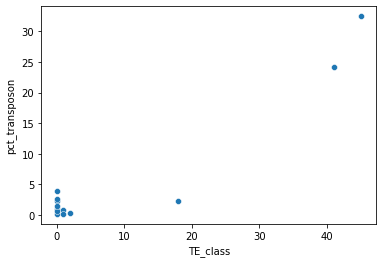

In [18]:
ax = sns.scatterplot(x="TE_class", y="pct_transposon", data=summary_combined)
plt.show()

### BLAST results analyses: TE classes and taxonomic distribution

#### Read BLAST files and filter eval<0.1

In [19]:
TE_desc_df = pd.DataFrame(columns=['cne_id', 'query_sp', 'TE_class', 'repbase_species', '%identity', 'align_length',
                                   'evalue'])
for blast_file in blastn_files:
    sp_id = blast_file.split("/")[-1].split("_")[0]
    blast_df = pd.read_csv(blast_file, sep="\t", names=['qseqid', 'stitle', 'sseqid', 'pident', 'length', 'mismatch',
                                                        'gapopen', 'qstart', 'qend', 'sstart', 'send', 'evalue',
                                                        'bitscore'])
    blast_df = blast_df[blast_df['evalue'] < 0.1]
    blast_df['stitle'].fillna('Unknwon_class Unknown species', inplace=True)
    for idx, row in blast_df.iterrows():
        hit_desc = row['stitle']
        #print(hit_desc)
        hit_class = row['stitle'].split()[0]
        hit_sp = "_".join(row['stitle'].split()[-2:])
        #print(hit_sp)
        new_row = [row['qseqid'], sp_id, hit_class, hit_sp, row['pident'], row['length'], row['evalue']]
        TE_desc_df.loc[len(TE_desc_df)] = new_row
TE_desc_df

,cne_id,query_sp,TE_class,repbase_species,%identity,align_length,evalue
0,aaur_cne_1161,aaur,tRNA,Arabidopsis_thaliana,86.486,74,2.770000e-15
1,aaur_cne_1609,aaur,tRNA,Arabidopsis_thaliana,92.453,53,2.340000e-15
2,aaur_cne_1656,aaur,tRNA,Arabidopsis_thaliana,87.838,74,5.690000e-17
3,aaur_cne_1657,aaur,tRNA,Arabidopsis_thaliana,87.838,74,5.730000e-17
4,aaur_cne_1742,aaur,tRNA,Arabidopsis_thaliana,96.721,61,5.890000e-23
...,...,...,...,...,...,...,...
5976,dgig_cne_7270,dgig,RTE,Amblyraja_radiata,86.970,330,8.430000e-100
5977,dgig_cne_7270,dgig,RTE,Pelodiscus_sinensis,83.942,137,9.310000e-30
5978,dgig_cne_2698,dgig,RTE,Danio_rerio,80.431,649,2.540000e-129
5979,dgig_cne_4928,dgig,RTE,Danio_rerio,80.833,840,1.050000e-173


#### Link species names with phylum

In [23]:
target_taxon = {'Acropora_digitifera': 'Cnidaria',
               'Acropora_palmata': 'Cnidaria',
                'Actinia_equina': 'Cnidaria',
                'Aedes_aegypti': 'Arthropoda',
                'Alligator_mississippiensis': 'Vertebrata',
                'Amblyraja_radiata': 'Vertebrata',
                'Amborella_trichopoda': 'Plant',
                'Aplysia_californica': 'Mollusca',
                'Arabidopsis_thaliana': 'Plant',
                'Arachis_ipaensis': 'Plant',
                'Branchiostoma_floridae': 'Cephalochordata',
                'Callorhinchus_milii': 'Vertebrata',
                'Capitella_teleta': 'Annelida',
                'Ciona_savignyi': 'Tunicata',
                'Copidosoma_floridanum': 'Arthropoda',
                'Crassostrea_gigas': 'Mollusca',
                'Culex_quinquefasciatus': 'Insecta',
                'Danio_rerio': 'Vertebrata',
                'Drosophila_ananassae': 'Arthropoda',
                'Drosophila_elegans':'Arthropoda',
                'Drosophila_grimshawi': 'Arthropoda',
                'Esox_lucius': 'Vertebrata',
                'Exaiptasia_pallida': 'Cnidaria',
                'Gavialis_gangeticus': 'Vertebrata',
                'Helobdella_robusta': 'Annelida',
                'Hydra_vulgaris': 'Cnidaria',
                'Hydractinia_symbiolongicarpus': 'Cnidaria',
                'Latimeria_chalumnae': 'Vertebrata',
                'Lepeophtheirus_salmonis': 'Arthropoda',
                'Litopenaeus_vannamei': 'Arthropoda',
                'Locusta_migratoria': 'Arthropoda',
                'Loxodonta_africana': 'Vertebrata',
                'Malus_domestica': 'Plant',
                'Manacus_vitellinus': 'Vertebrata',
                'Microbotryum_saponariae': 'Fungi',
                'Monodelphis_domestica': 'Vertebrata',
                'Nasonia_vitripennis': 'Arthropoda',
                'Nematostella_vectensis': 'Cnidaria',
                'Notospermus_geniculatus': 'Nemertea',
                'Orbicella_faveolata': 'Cnidaria',
                'Oryza_sativa': 'Plant',
                'Oryzias_latipes': 'Vertebrata',
                'Pelodiscus_sinensis': 'Vertebrata',
                'Petromyzon_marinus': 'Vertebrata',
                'RTE_Crocodylidae': 'Vertebrata',
                'Saccoglossus_kowalevskii': 'Hemichordata',
                'Salmo_salar': 'Vertebrata',
                'Strongylocentrotus_purpuratus': 'Echinodermata',
                'Stylophora_pistillata': 'Cnidaria',
                'Tegillarca_granosa': 'Mollusca',
                'Tribolium_castaneum': 'Arthropoda',
                'Unknown_species': 'Unknown',
                'Vitis_vinifera': 'Plant',
                'Zea_mays': 'Plant',
                'picta_bellii': 'Vertebrata',
                'subsp._europaea': 'Plant',
                'tRNA_Vertebrata': 'Vertebrata'
               }

In [24]:
target_taxon_df = pd.DataFrame(target_taxon.items(), columns=['repbase_species', 'hit_taxon'])

In [25]:
target_taxon_df

,repbase_species,hit_taxon
0,Acropora_digitifera,Cnidaria
1,Acropora_palmata,Cnidaria
2,Actinia_equina,Cnidaria
3,Aedes_aegypti,Arthropoda
4,Alligator_mississippiensis,Vertebrata
5,Amblyraja_radiata,Vertebrata
6,Amborella_trichopoda,Plant
7,Aplysia_californica,Mollusca
8,Arabidopsis_thaliana,Plant
9,Arachis_ipaensis,Plant


#### Add phylum info to BLAST results

In [28]:
TE_desc_taxon_df=TE_desc_df.merge(target_taxon_df)
TE_desc_taxon_df

,cne_id,query_sp,TE_class,repbase_species,%identity,align_length,evalue,hit_taxon
0,aaur_cne_1161,aaur,tRNA,Arabidopsis_thaliana,86.486,74,2.770000e-15,Plant
1,aaur_cne_1609,aaur,tRNA,Arabidopsis_thaliana,92.453,53,2.340000e-15,Plant
2,aaur_cne_1656,aaur,tRNA,Arabidopsis_thaliana,87.838,74,5.690000e-17,Plant
3,aaur_cne_1657,aaur,tRNA,Arabidopsis_thaliana,87.838,74,5.730000e-17,Plant
4,aaur_cne_1742,aaur,tRNA,Arabidopsis_thaliana,96.721,61,5.890000e-23,Plant
...,...,...,...,...,...,...,...,...
5976,dgig_cne_7270,dgig,RTE,Helobdella_robusta,80.623,289,5.000000e-56,Annelida
5977,ofav_cne_32615,ofav,R1,Tribolium_castaneum,94.737,38,1.070000e-08,Arthropoda
5978,ofav_cne_48457,ofav,Ginger2/TDD,Tegillarca_granosa,79.397,199,8.980000e-29,Mollusca
5979,ofav_cne_20127,ofav,RTE,Oryzias_latipes,78.295,129,2.150000e-15,Vertebrata


#### Count number of phyla hit by each CNE

In [29]:
hit_taxon_distrib = TE_desc_taxon_df[['cne_id', 'hit_taxon']].\
                        drop_duplicates(['cne_id','hit_taxon']).groupby('cne_id').count().reset_index()
hit_taxon_distrib = hit_taxon_distrib.astype({"hit_taxon": int})
hit_taxon_distrib

,cne_id,hit_taxon
0,aaur_cne_1013,1
1,aaur_cne_1086,1
2,aaur_cne_1161,2
3,aaur_cne_1284,1
4,aaur_cne_1389,2
...,...,...
4473,spis_cne_98987,1
4474,spis_cne_99500,1
4475,spis_cne_99868,1
4476,spis_cne_99869,1


In [30]:
#### Write to file for plotting in R
hit_taxon_distrib.to_csv('hit_taxon_distrib.tsv', sep="\t", index=False)

In [31]:
max(hit_taxon_distrib['hit_taxon'])

3

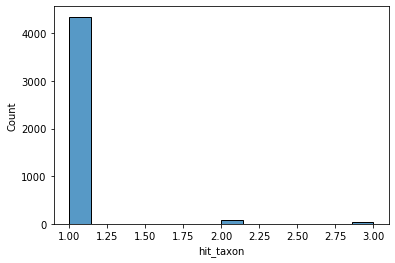

In [32]:
sns.histplot(data=hit_taxon_distrib, x="hit_taxon")
plt.show()

### Count BLAST hits by phylum

In [33]:
phyla_counts = TE_desc_taxon_df[['cne_id','hit_taxon']].groupby('hit_taxon').count()\
                    .sort_values('cne_id', ascending=False).reset_index().rename({'cne_id':'cne_count'}, axis=1)   
phyla_counts

,hit_taxon,cne_count
0,Cnidaria,5255
1,Vertebrata,212
2,Plant,208
3,Unknown,153
4,Arthropoda,43
5,Tunicata,32
6,Cephalochordata,28
7,Mollusca,19
8,Annelida,13
9,Fungi,12


In [34]:
phyla_counts.to_csv('phyla_counts.tsv', sep="\t", index=False)

### Count BLAST hits by TE class

In [36]:
class_counts = TE_desc_taxon_df[['cne_id', 'TE_class']].drop_duplicates(['cne_id', 'TE_class'])\
            .groupby('TE_class').count().sort_values('cne_id', ascending=False)\
            .reset_index().rename({'cne_id':'cne_count'}, axis=1)
class_counts

,TE_class,cne_count
0,DIRS,430
1,Mariner/Tc1,404
2,Gypsy,363
3,Sola3,285
4,hAT,278
5,Helitron,268
6,Penelope,241
7,Polinton,233
8,Academ,222
9,Harbinger,210


In [37]:
class_counts

,TE_class,cne_count
0,DIRS,430
1,Mariner/Tc1,404
2,Gypsy,363
3,Sola3,285
4,hAT,278
5,Helitron,268
6,Penelope,241
7,Polinton,233
8,Academ,222
9,Harbinger,210


In [38]:
class_counts.to_csv('class_counts.tsv', sep="\t", index=False)

### Count BLAST hits of each TE class and phylum

In [39]:
phyla_class_counts = TE_desc_taxon_df[['cne_id','hit_taxon', 'TE_class']].groupby(['hit_taxon', 'TE_class']).count()\
                    .sort_values('cne_id', ascending=False).reset_index().rename({'cne_id':'cne_count'}, axis=1)
phyla_class_counts

,hit_taxon,TE_class,cne_count
0,Cnidaria,DIRS,922
1,Cnidaria,Mariner/Tc1,527
2,Cnidaria,Sola3,409
3,Cnidaria,Gypsy,380
4,Cnidaria,Harbinger,271
...,...,...,...
75,Mollusca,Helitron,1
76,Cephalochordata,Crack,1
77,Cnidaria,Rex1,1
78,Cnidaria,Zator,1


In [40]:
phyla_class_counts.to_csv('phyla_class_counts.tsv', sep="\t", index=False)

### AFTER RUNNING ANALYSIS IN OTHER PHYLA, RUN CODE BELOW

### Combine phya counts for plotting in R

In [42]:
cnidaria_phyla_counts = phyla_counts
mollusca_phyla_counts = pd.read_csv('../../../mollusca_06_22/transposon_analysis/repbase_analysis/phyla_counts.tsv',
                                    sep="\t")
arthropoda_phyla_counts = pd.read_csv('../../../arthropoda_06_22/transposon_analysis/repbase_analysis/phyla_counts.tsv', 
                                      sep="\t")

In [43]:
cnidaria_phyla_counts['origin'] = 'Cnidaria'
mollusca_phyla_counts['origin'] = 'Mollusca'
arthropoda_phyla_counts['origin'] = 'Arthropoda'

In [44]:
df_list = [cnidaria_phyla_counts, mollusca_phyla_counts, arthropoda_phyla_counts]
all_phyla_counts = pd.concat(df_list)
all_phyla_counts

,hit_taxon,cne_count,origin
0,Cnidaria,5255,Cnidaria
1,Vertebrata,212,Cnidaria
2,Plant,208,Cnidaria
3,Unknown,153,Cnidaria
4,Arthropoda,43,Cnidaria
5,Tunicata,32,Cnidaria
6,Cephalochordata,28,Cnidaria
7,Mollusca,19,Cnidaria
8,Annelida,13,Cnidaria
9,Fungi,12,Cnidaria


In [46]:
plot_df = pd.DataFrame(columns=list(set(all_phyla_counts['hit_taxon'])), index=['Cnidaria', 'Mollusca', 'Arthropoda'])
for idx, row in all_phyla_counts.iterrows():
    origin = row['origin']
    cne_count = row['cne_count']
    destination = row['hit_taxon']
    plot_df.loc[origin, destination] = cne_count
plot_df = new_df.fillna(0)
plot_df

,Echinodermata,Hemichordata,Cephalochordata,Unknown,Vertebrata,Insecta,Cnidaria,Tunicata,Mollusca,Plant,Chromista,Fungi,Nematoda,Annelida,Platyhelminthes,Nemertea,Arthropoda,Amoebozoa
Cnidaria,1,3,28,153,212,1,5255,32,19,208,0,12,0,13,0,1,43,0
Mollusca,15,27,57,434,2227,0,204,1,4066,167,0,1,56,29,44,0,744,3
Arthropoda,0,33,2,633,2911,0,47,0,0,361,7,10,193,26,1622,0,5572,0


In [47]:
plot_df.to_csv('multi_phylum_phyla_counts.tsv', sep="\t")

### Combine class counts

In [49]:
cnidaria_class_counts = class_counts
mollusca_class_counts = pd.read_csv('../../../mollusca_06_22/transposon_analysis/repbase_analysis/class_counts.tsv', 
                                   sep="\t")
arthropoda_class_counts = pd.read_csv("../../../arthropoda_06_22/transposon_analysis/repbase_analysis/class_counts.tsv",
                                     sep="\t")

In [51]:
# Read class_count tables
cnidaria_class_counts = class_counts
mollusca_class_counts = pd.read_csv('../../../mollusca_06_22/transposon_analysis/repbase_analysis/class_counts.tsv', 
                                   sep="\t", dtype={'cne_count': 'Int32'})
arthropoda_class_counts = pd.read_csv("../../../arthropoda_06_22/transposon_analysis/repbase_analysis/class_counts.tsv",
                                     sep="\t", dtype={'cne_count': 'Int32'})
# Rename %count
cnidaria_class_counts['cnidaria_pct_count'] = round(100*cnidaria_class_counts['cne_count']/\
                                                sum(cnidaria_class_counts['cne_count']),2)
mollusca_class_counts['mollusca_pct_count'] = round(100*mollusca_class_counts['cne_count']/\
                                                sum(mollusca_class_counts['cne_count']),2)
arthropoda_class_counts['arthropoda_pct_count'] = round(100*arthropoda_class_counts['cne_count']/\
                                                sum(arthropoda_class_counts['cne_count']),2)
# Rename count
cnidaria_class_counts = cnidaria_class_counts.rename({'cne_count': 'cnidaria_cne_count'}, axis=1)
mollusca_class_counts = mollusca_class_counts.rename({'cne_count': 'mollusca_cne_count'}, axis=1)
arthropoda_class_counts = arthropoda_class_counts.rename({'cne_count': 'arthropoda_cne_count'}, axis=1)
#merge
all_phyla_class_counts = cnidaria_class_counts.merge(mollusca_class_counts, on='TE_class', how='left')\
                            .merge(arthropoda_class_counts, on='TE_class', how='left')
all_phyla_class_counts = all_phyla_class_counts.fillna(0)
all_phyla_class_counts['avg_pct_count'] = round(all_phyla_class_counts[['cnidaria_pct_count', 'mollusca_pct_count',
                                                                  'arthropoda_pct_count']].mean(axis=1), 2)
all_phyla_class_counts = all_phyla_class_counts.sort_values('avg_pct_count', ascending=False)
all_phyla_class_counts

,TE_class,cnidaria_cne_count,cnidaria_pct_count,mollusca_cne_count,mollusca_pct_count,arthropoda_cne_count,arthropoda_pct_count,avg_pct_count
4,hAT,278,5.98,502,10.26,2308,31.09,15.78
1,Mariner/Tc1,404,8.69,263,5.38,1838,24.76,12.94
0,DIRS,430,9.25,891,18.22,14,0.19,9.22
15,tRNA,121,2.60,569,11.63,929,12.51,8.91
13,Unknwon_class,131,2.82,397,8.12,540,7.27,6.07
2,Gypsy,363,7.81,300,6.13,297,4.00,5.98
12,RTE,142,3.06,534,10.92,176,2.37,5.45
5,Helitron,268,5.77,97,1.98,524,7.06,4.94
11,EnSpm/CACTA,155,3.33,265,5.42,87,1.17,3.31
9,Harbinger,210,4.52,100,2.04,88,1.19,2.58


#### Only keep classes representing >1% TE-CNEs

In [52]:
all_phyla_main_classes = all_phyla_class_counts[all_phyla_class_counts['avg_pct_count']>=1]
all_phyla_main_classes

,TE_class,cnidaria_cne_count,cnidaria_pct_count,mollusca_cne_count,mollusca_pct_count,arthropoda_cne_count,arthropoda_pct_count,avg_pct_count
4,hAT,278,5.98,502,10.26,2308,31.09,15.78
1,Mariner/Tc1,404,8.69,263,5.38,1838,24.76,12.94
0,DIRS,430,9.25,891,18.22,14,0.19,9.22
15,tRNA,121,2.60,569,11.63,929,12.51,8.91
13,Unknwon_class,131,2.82,397,8.12,540,7.27,6.07
2,Gypsy,363,7.81,300,6.13,297,4.00,5.98
12,RTE,142,3.06,534,10.92,176,2.37,5.45
5,Helitron,268,5.77,97,1.98,524,7.06,4.94
11,EnSpm/CACTA,155,3.33,265,5.42,87,1.17,3.31
9,Harbinger,210,4.52,100,2.04,88,1.19,2.58


In [53]:
all_phyla_main_classes.to_csv('all_phyla_main_classes.tsv', sep="\t", index=False)

In [74]:
cnidaria_class_counts

,TE_class,cnidaria_cne_count,cnidaria_pct_count
0,DIRS,430,9.251291
1,Mariner/Tc1,404,8.691910
2,Gypsy,363,7.809811
3,Sola3,285,6.131670
4,hAT,278,5.981067
5,Helitron,268,5.765921
6,Penelope,241,5.185026
7,Polinton,233,5.012909
8,Academ,222,4.776248
9,Harbinger,210,4.518072
